In [174]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [152]:

data = pd.read_csv('/content/Final_data (1).csv')
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [153]:
data.dtypes

,0
Age,float64
Gender,object
Weight (kg),float64
Height (m),float64
Max_BPM,float64
Avg_BPM,float64
Resting_BPM,float64
Session_Duration (hours),float64
Calories_Burned,float64
Workout_Type,object


Text(0.5, 1.0, 'Age Distribution')

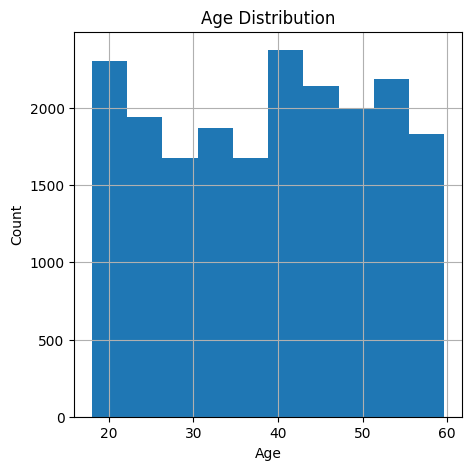

In [154]:
data['Age'].hist(figsize=(5, 5))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Age Distribution")

Text(0.5, 1.0, 'Gender Distribution')

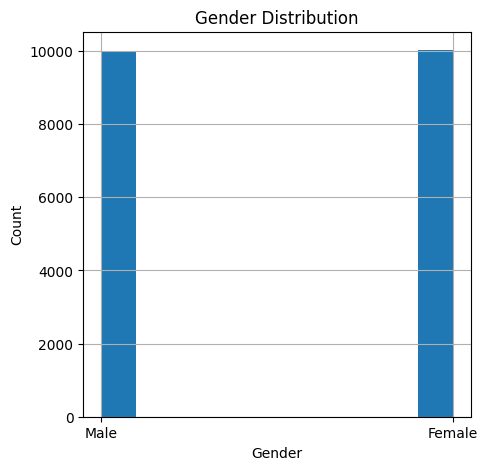

In [155]:
data['Gender'].hist(figsize=(5, 5))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Gender Distribution")


Text(0.5, 1.0, 'Weight Distribution')

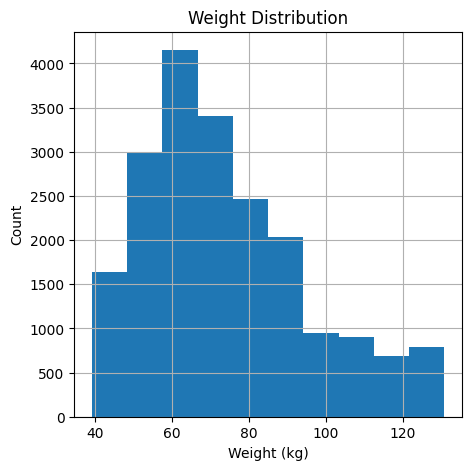

In [156]:
data["Weight (kg)"].hist(figsize=(5, 5))
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.title("Weight Distribution")

Text(0.5, 1.0, 'Height Distribution')

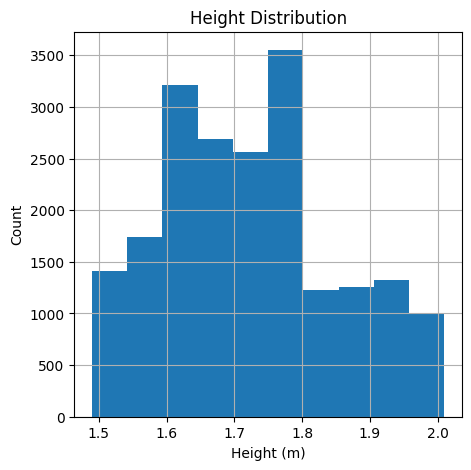

In [157]:
data["Height (m)"].hist(figsize=(5, 5))
plt.xlabel('Height (m)')
plt.ylabel('Count')
plt.title("Height Distribution")

Text(0.5, 1.0, 'Weight V. Height')

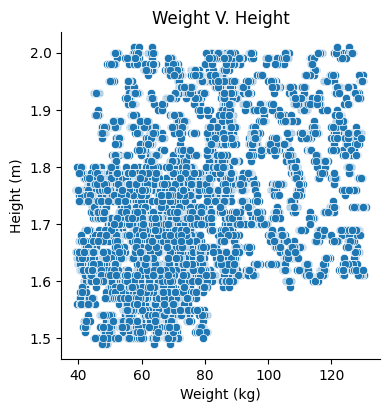

In [158]:
sns.relplot(x = "Weight (kg)", y = "Height (m)", data = data, height=4, aspect=1)
plt.xlabel('Weight (kg)')
plt.ylabel('Height (m)')
plt.title("Weight V. Height")


Text(0.5, 1.0, 'Session Duration V. Calories Burned')

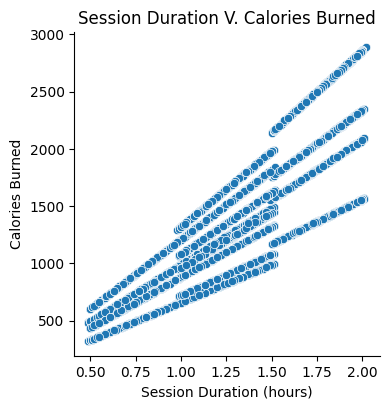

In [159]:
sns.relplot(x = "Session_Duration (hours)", y = "Calories_Burned", data = data,height=4, aspect=1)
plt.xlabel('Session Duration (hours)')
plt.ylabel('Calories Burned')
plt.title("Session Duration V. Calories Burned")


In [160]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [161]:
x = data[["Age", "Weight (kg)", "Height (m)", "Session_Duration (hours)"]]
x

,Age,Weight (kg),Height (m),Session_Duration (hours)
0,34.91,65.27,1.62,1.00
1,23.37,56.41,1.55,1.37
2,33.20,58.98,1.67,0.91
3,38.69,93.78,1.70,1.10
4,45.09,52.42,1.88,1.08
...,...,...,...,...
19995,46.77,98.31,1.90,0.77
19996,40.38,88.12,1.87,1.97
19997,50.31,46.20,1.67,1.36
19998,52.36,44.30,1.62,1.41


In [162]:
y = data["Calories_Burned"]
y

,Calories_Burned
0,1080.90
1,1809.91
2,802.26
3,1450.79
4,1166.40
...,...
19995,761.61
19996,2303.13
19997,1468.80
19998,929.75


In [163]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20,random_state = 40)

In [164]:
dt = DecisionTreeRegressor(max_depth = 5)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [165]:
dt_pred = dt.predict(x_test)
dt_pred

array([1081.00413259, 2151.79915374, 1081.00413259, ..., 1420.91861272,
       1276.03213725, 1081.00413259])

In [166]:
mse = mean_squared_error(y_test, dt_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 83656.3748080611


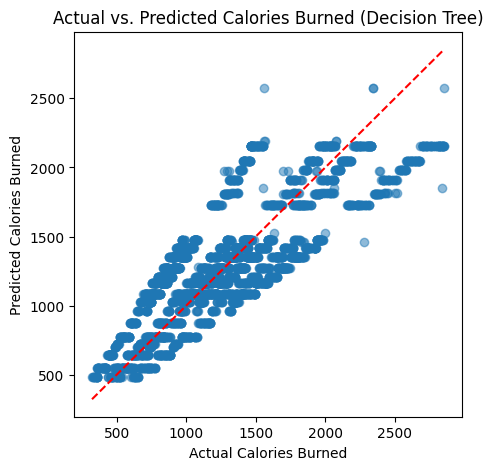

In [167]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, dt_pred, alpha=0.5)
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Actual vs. Predicted Calories Burned (Decision Tree)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

DecisionTreeRegressor(max_depth=8)

array([1025.69465116, 2130.02838462, 1067.0938986 , ..., 1397.82033248,
       1268.93675803, 1067.0938986 ])

Mean Squared Error: 88359.75782333977


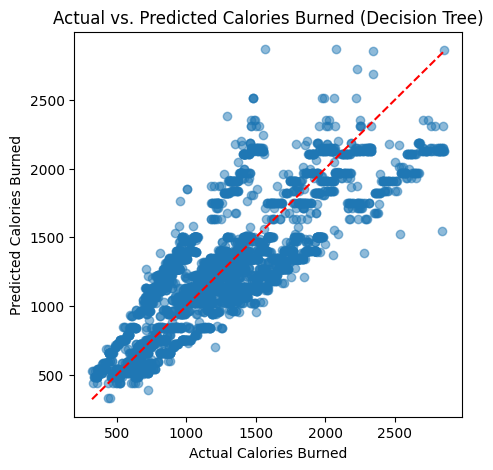

In [168]:
dt2 = DecisionTreeRegressor(max_depth = 8)
display(dt2.fit(x_train, y_train))
dt2_pred = dt2.predict(x_test)
display(dt2_pred)
mse = mean_squared_error(y_test, dt2_pred)
print("Mean Squared Error:", mse)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, dt2_pred, alpha=0.5)
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Actual vs. Predicted Calories Burned (Decision Tree)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

DecisionTreeRegressor(max_depth=12)

array([1134.44047619, 2222.25857143, 1057.18377778, ..., 1490.84571429,
       1365.45734694, 1121.36921569])

Mean Squared Error: 98852.46177807731


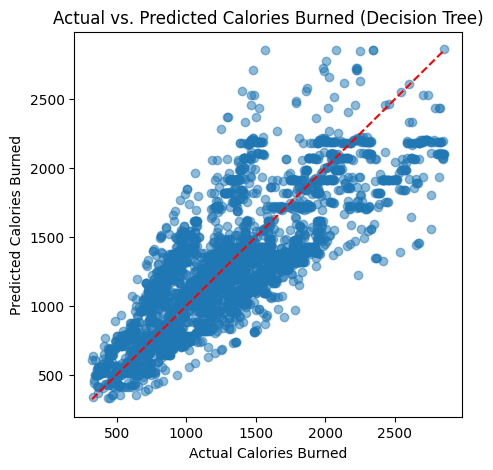

In [169]:
dt3 = DecisionTreeRegressor(max_depth = 12)
display(dt3.fit(x_train, y_train))
dt3_pred = dt3.predict(x_test)
display(dt3_pred)
mse = mean_squared_error(y_test, dt3_pred)
print("Mean Squared Error:", mse)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, dt3_pred, alpha=0.5)
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Actual vs. Predicted Calories Burned (Decision Tree)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

RandomForestRegressor(max_depth=5, n_estimators=500)

83119.51595831609

Mean Squared Error: 83119.51595831609


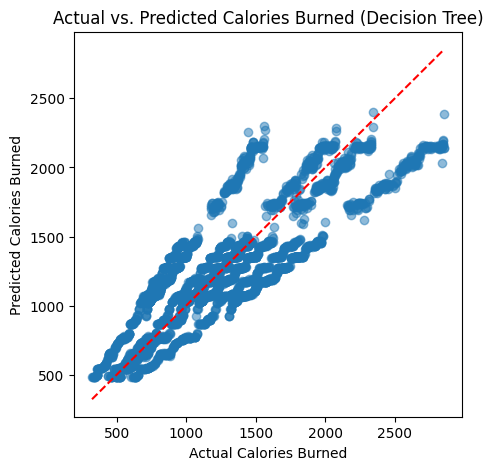

In [170]:
rf= RandomForestRegressor(n_estimators = 500, max_depth = 5)
display(rf.fit(x_train, y_train))

rf_pred = rf.predict(x_test)

mse = mean_squared_error(y_test, rf_pred)
display(mse)
print("Mean Squared Error:", mse)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Actual vs. Predicted Calories Burned (Decision Tree)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

RandomForestRegressor(max_depth=8, n_estimators=800)

83564.08971776148

Mean Squared Error: 83564.08971776148


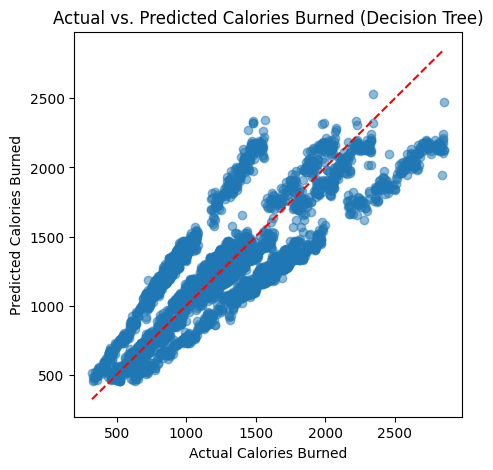

In [171]:
rf2= RandomForestRegressor(n_estimators = 800, max_depth = 8)
display(rf2.fit(x_train, y_train))

rf2_pred = rf2.predict(x_test)

mse = mean_squared_error(y_test, rf2_pred)
display(mse)
print("Mean Squared Error:", mse)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, rf2_pred, alpha=0.5)
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Actual vs. Predicted Calories Burned (Decision Tree)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

RandomForestRegressor(max_depth=5, n_estimators=1000)

83050.49747868747

Mean Squared Error: 83050.49747868747


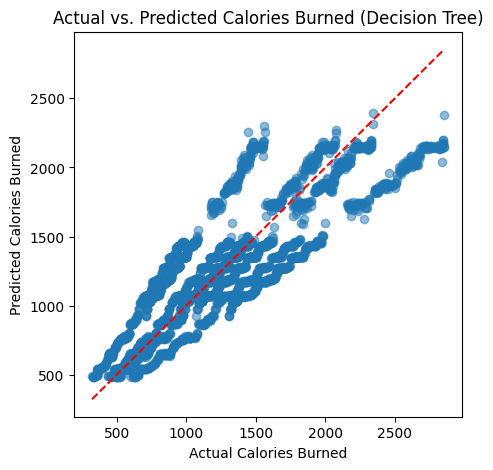

In [172]:
rf3= RandomForestRegressor(n_estimators = 1000, max_depth = 5)
display(rf3.fit(x_train, y_train))

rf3_pred = rf3.predict(x_test)

mse = mean_squared_error(y_test, rf3_pred)
display(mse)
print("Mean Squared Error:", mse)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, rf3_pred, alpha=0.5)
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Actual vs. Predicted Calories Burned (Decision Tree)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
